In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

In [3]:
def get_actions(s_t,visited=[]):
    actions=[]
    if s_t in [[1,3],[2,3],[3,3],[3,2],[3,1]]:
        return actions
    u=s_t[0]-1
    d=s_t[0]+1
    l=s_t[1]-1
    r=s_t[1]+1
    if u>=1 and u<=3 and [u,s_t[1]] not in visited:
        actions.append("u")
    if d>=1 and d<=3 and [d,s_t[1]] not in visited:
        actions.append("d")
    if l>=1 and l<=3 and [s_t[0],l] not in visited:
        actions.append("l")
    if r>=1 and r<=3 and [s_t[0],r] not in visited:
        actions.append("r")
    return actions

In [6]:
def get_next_and_reward(s_t,a_t):
    environment=[
        [0,3,3],
        [3,3,-10],
        [10,0,0]
    ]
    s_t_1=[s_t[0],s_t[1]]
    if a_t=="u":
        s_t_1[0]=s_t_1[0]-1
    elif a_t=="d":
        s_t_1[0]=s_t_1[0]+1
    elif a_t=="l":
        s_t_1[1]=s_t_1[1]-1
    elif a_t=="r":
        s_t_1[1]=s_t_1[1]+1
    if s_t_1[0]<1 or s_t_1[0]>3 or s_t_1[1]<1 or s_t_1[1]>3:
        s_t_1=None
        r_s_a=-100
    else:
        r_s_a=environment[s_t_1[0]-1][s_t_1[1]-1]
    return s_t_1,r_s_a

In [7]:
def maxQ(Q,s_t,visited=[]):
    max_qi=0
    a_t=None
    actions=get_actions(s_t,visited=visited)
    for a in actions:
        qi=Q[(s_t[0],s_t[1],a)]
        if qi>=max_qi:
            a_t=a
            max_qi=qi
    return a_t,max_qi 

In [8]:
def episode(Q,s_t,alfa,gamma,epsilon,trace=False,trace_search=False):
    end=False
    visited=[]
    while not end:
        visited.append(s_t)
        p=random.uniform(0,1)
        actions=get_actions(s_t,visited=visited)
        if len(actions)>0:
            if p<epsilon:
                a_t=random.choice(actions)
                if trace_search:
                    print("E",end="")
            else:
                a_t,_=maxQ(Q,s_t,visited=visited)
                if trace_search:
                    print("X",end="")
            s_t_1,r_s_a=get_next_and_reward(s_t,a_t)
            if s_t_1 is not None:
                _,max_qi=maxQ(Q,s_t_1,visited=visited)
                Q[(s_t[0],s_t[1],a_t)]=Q[s_t[0],s_t[1],a_t]+alfa*(r_s_a+gamma*max_qi-Q[s_t[0],s_t[1],a_t])
                if trace:
                    print(s_t,actions,a_t,s_t_1,r_s_a,visited)
                s_t=s_t_1
            else:
                if trace:
                    print("Fin Episodio",s_t,a_t)
                end=True
        else:
            if trace:    
                print("Fin Episodio",s_t)
            end=True

In [9]:
Q={}
S=[]
A=["d","u","r","l"]
for i in [1,2,3]:
    for j in [1,2,3]:
        S.append([i,j])
        for a in A:
            Q[(i,j,a)]=0
epochs=1000
epsilon=1
for step in range(epochs):
    episode(Q,[1,1],alfa=1,gamma=1,epsilon=epsilon)
    epsilon=math.exp(-5/epochs*step)

In [10]:
T=[]
A=["d","u","r","l"]
header=["Q"]
header.extend(A)
T.append(header)
for i in [1,2,3]:
    for j in [1,2,3]:
        t=[]
        t.append("Q[({0},{1})]".format(i,j))
        for a in A:
            t.append(Q[(i,j,a)])
        T.append(t)
pd.DataFrame(T[1:],columns=T[0])

,Q,d,u,r,l
0,"Q[(1,1)]",13,0,19,0
1,"Q[(1,2)]",16,0,3,0
2,"Q[(1,3)]",0,0,0,0
3,"Q[(2,1)]",10,0,9,0
4,"Q[(2,2)]",0,6,-10,13
5,"Q[(2,3)]",0,0,0,0
6,"Q[(3,1)]",0,0,0,0
7,"Q[(3,2)]",0,0,0,0
8,"Q[(3,3)]",0,0,0,0


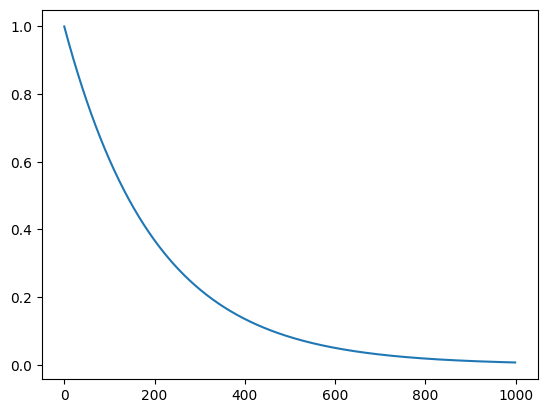

In [8]:
x=np.asarray([i for i in range(1000)])
y=np.exp(-5/1000*x)
plt.plot(x,y)